In [461]:
import pandas as pd

df = pd.read_csv('stocks/TSLA_3years.csv', index_col=0)
df.index = pd.to_datetime(df.index, yearfirst=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
...,...,...,...,...,...,...
2023-01-24,143.000000,146.500000,141.100006,143.889999,143.889999,158699100
2023-01-25,141.910004,146.410004,138.070007,144.429993,144.429993,192734300
2023-01-26,159.970001,161.419998,154.759995,160.270004,160.270004,234815100


In [434]:
df.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26',
               '2023-01-27', '2023-01-30'],
              dtype='datetime64[ns]', name='Date', length=775, freq=None)

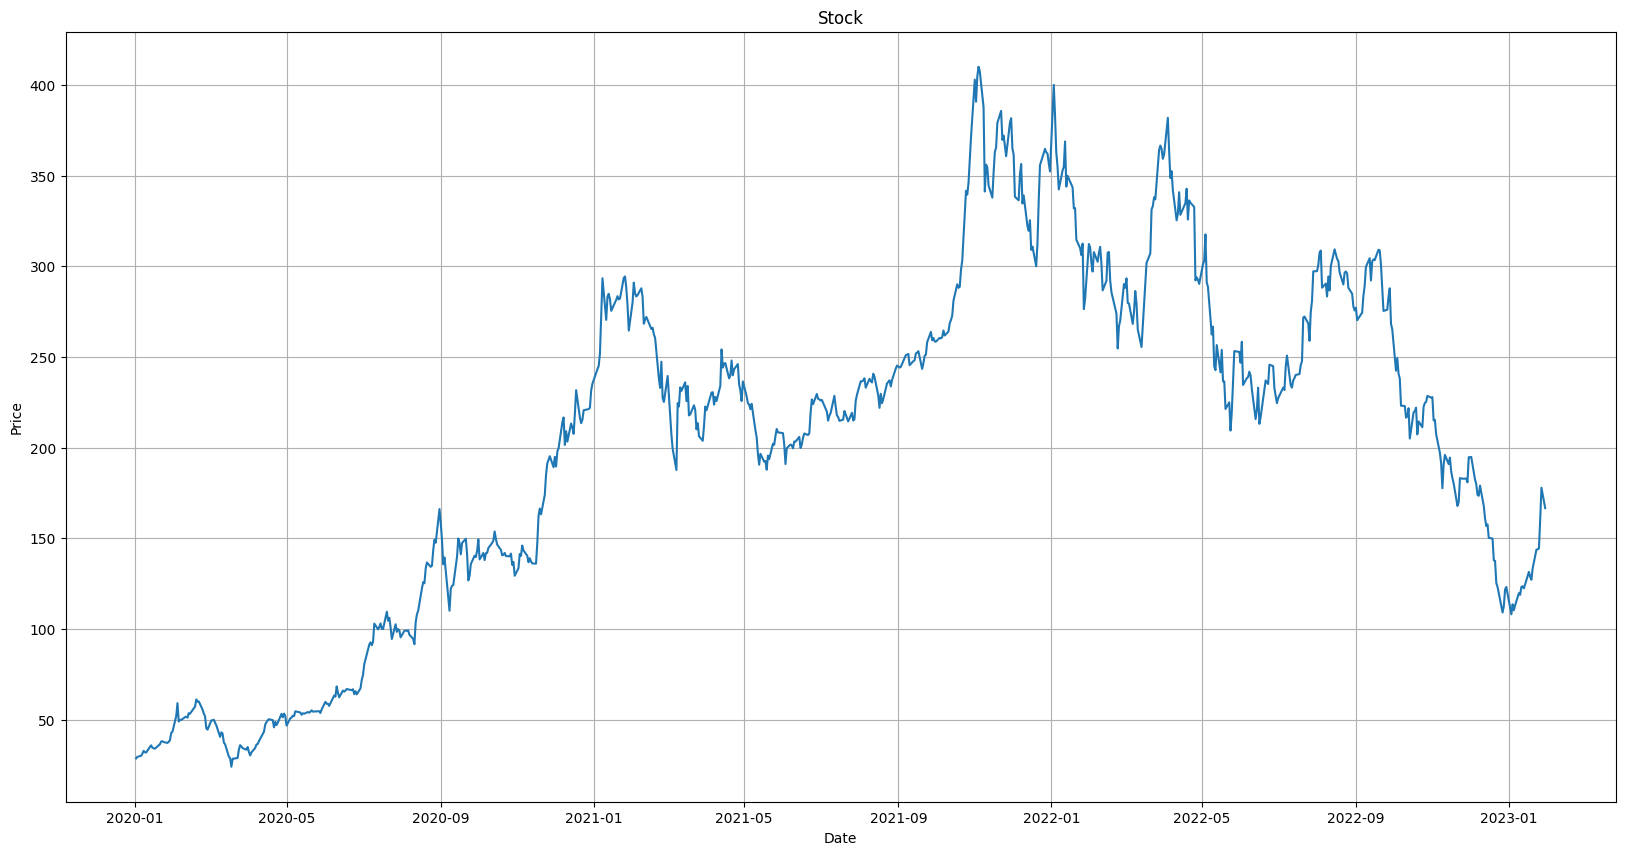

In [435]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.title('Stock')
plt.plot(df.index.values, df['Close'])
plt.xlabel('Date')
plt.ylabel('Price')

plt.grid()
plt.savefig('graphs/TSLA_chart.png')

In [436]:
import numpy as np

filt = df.filter(['Close'])
data = df['Close']
total_lim = len(data)
train_lim, val_lim = int(total_lim * .7), int(total_lim * .9)

train_lim, val_lim, total_lim

(542, 697, 775)

In [437]:
data = np.expand_dims(data, axis=1)
data = np.array(data, dtype=np.float64)
data

array([[ 28.684   ],
       [ 29.534   ],
       [ 30.102667],
       [ 31.270666],
       [ 32.809334],
       [ 32.089333],
       [ 31.876667],
       [ 34.990665],
       [ 35.861332],
       [ 34.566666],
       [ 34.232666],
       [ 34.033333],
       [ 36.48    ],
       [ 37.970669],
       [ 38.146667],
       [ 37.654667],
       [ 37.201332],
       [ 37.793331],
       [ 38.732666],
       [ 42.720669],
       [ 43.371334],
       [ 52.      ],
       [ 59.137333],
       [ 48.98    ],
       [ 49.930668],
       [ 49.871334],
       [ 51.418667],
       [ 51.625332],
       [ 51.152668],
       [ 53.599998],
       [ 53.335335],
       [ 57.226665],
       [ 61.161331],
       [ 59.960667],
       [ 60.066666],
       [ 55.585999],
       [ 53.327332],
       [ 51.919998],
       [ 45.266666],
       [ 44.532665],
       [ 49.574669],
       [ 49.700668],
       [ 49.966667],
       [ 48.302666],
       [ 46.898666],
       [ 40.533333],
       [ 43.021999],
       [ 42.2

In [438]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
data = scaled_data

data

array([[0.01192745],
       [0.01413016],
       [0.01560381],
       [0.01863059],
       [0.02261793],
       [0.0207521 ],
       [0.02020099],
       [0.02827067],
       [0.03052694],
       [0.02717191],
       [0.02630638],
       [0.02578982],
       [0.03213017],
       [0.03599312],
       [0.0364492 ],
       [0.03517422],
       [0.03399944],
       [0.03553356],
       [0.03796777],
       [0.04830237],
       [0.04998851],
       [0.07234902],
       [0.09084485],
       [0.06452293],
       [0.06698651],
       [0.06683275],
       [0.07084254],
       [0.0713781 ],
       [0.07015323],
       [0.07649529],
       [0.07580944],
       [0.08589351],
       [0.09608989],
       [0.09297846],
       [0.09325315],
       [0.08164185],
       [0.0757887 ],
       [0.0721417 ],
       [0.05490012],
       [0.05299801],
       [0.06606397],
       [0.06639048],
       [0.0670798 ],
       [0.06276767],
       [0.05912932],
       [0.04263406],
       [0.04908324],
       [0.047

In [439]:
train_data = data[:train_lim+1, :]
val_data = data[train_lim:val_lim+1, :]
test_data = data[val_lim-50-1:, :]#

x_train, x_val, x_test = [], [], []
y_train, y_val, y_test = [], [], []

for i in range(50, train_lim):
    x_train.append(train_data[i-50:i, 0])
    y_train.append(train_data[i+1, 0])

for i in range(50, val_lim - train_lim):
    x_val.append(val_data[i-50:i, 0])
    y_val.append(val_data[i+1, 0])

for i in range(50, total_lim - val_lim+50):#
    x_test.append(test_data[i-50:i, 0])
    y_test.append(test_data[i+1, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_test

array([[0.64976947, 0.66552527, 0.70763586, ..., 0.56575556, 0.58399919,
        0.56163521],
       [0.66552527, 0.70763586, 0.70796414, ..., 0.58399919, 0.56163521,
        0.55469022],
       [0.70763586, 0.70796414, 0.71654174, ..., 0.56163521, 0.55469022,
        0.51566343],
       ...,
       [0.43183094, 0.4454359 , 0.43242696, ..., 0.28334251, 0.3101119 ,
        0.31047469],
       [0.4454359 , 0.43242696, 0.44141919, ..., 0.3101119 , 0.31047469,
        0.31187405],
       [0.43242696, 0.44141919, 0.42198354, ..., 0.31047469, 0.31187405,
        0.35292218]])

In [440]:
time = df.index

train_time = time[:train_lim+1]
val_time = time[train_lim:val_lim+1]
test_time = time[val_lim:]
test_time

DatetimeIndex(['2022-10-07', '2022-10-10', '2022-10-11', '2022-10-12',
               '2022-10-13', '2022-10-14', '2022-10-17', '2022-10-18',
               '2022-10-19', '2022-10-20', '2022-10-21', '2022-10-24',
               '2022-10-25', '2022-10-26', '2022-10-27', '2022-10-28',
               '2022-10-31', '2022-11-01', '2022-11-02', '2022-11-03',
               '2022-11-04', '2022-11-07', '2022-11-08', '2022-11-09',
               '2022-11-10', '2022-11-11', '2022-11-14', '2022-11-15',
               '2022-11-16', '2022-11-17', '2022-11-18', '2022-11-21',
               '2022-11-22', '2022-11-23', '2022-11-25', '2022-11-28',
               '2022-11-29', '2022-11-30', '2022-12-01', '2022-12-02',
               '2022-12-05', '2022-12-06', '2022-12-07', '2022-12-08',
               '2022-12-09', '2022-12-12', '2022-12-13', '2022-12-14',
               '2022-12-15', '2022-12-16', '2022-12-19', '2022-12-20',
               '2022-12-21', '2022-12-22', '2022-12-23', '2022-12-27',
      

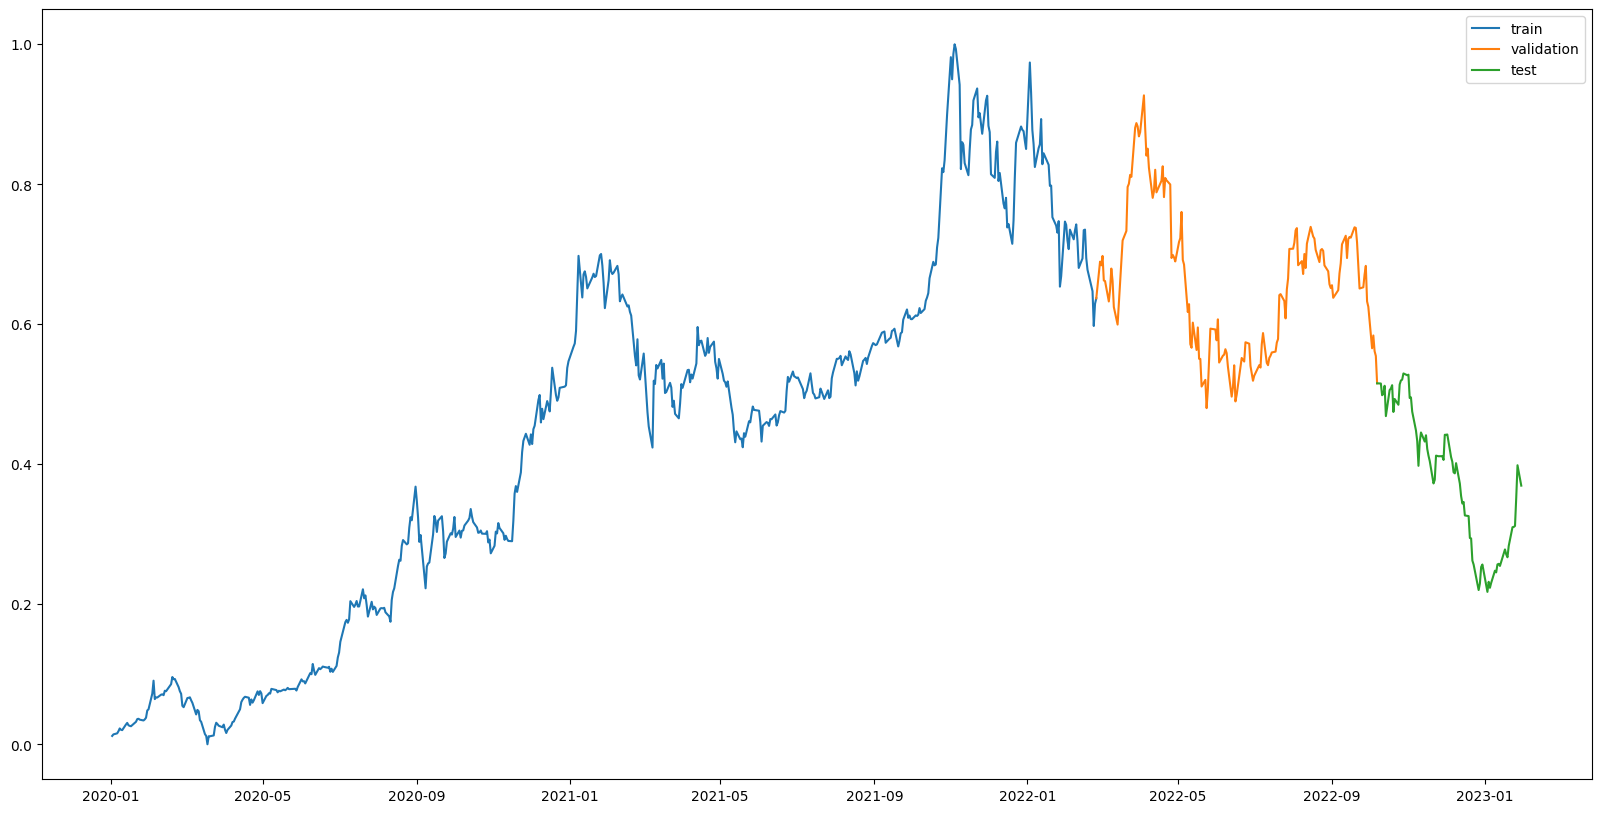

In [441]:
plt.figure(figsize=(20,10))
plt.plot(train_time, train_data)
plt.plot(val_time, val_data)
plt.plot(test_time, test_data[50+1:,:])

plt.legend(['train', 'validation', 'test'])
plt.savefig('graphs/separated_data.png')

In [442]:
x_train = np.expand_dims(x_train, axis=2)
x_val = np.expand_dims(x_val, axis=2)
x_train.shape

(492, 50, 1)

In [443]:
from tensorflow.python.keras.optimizer_v2.rmsprop import RMSprop
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import LSTM, Dense
from tensorflow.python.keras.optimizer_v2.adam import Adam
from tensorflow.python.keras import layers

model = Sequential()
model.add(LSTM(50, return_sequences=True)) # first layer
model.add(LSTM(50))
model.add(Dense(25))
model.add(Dense(1))

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50)

Epoch 1/50
16/16 [==============================] - 7s 86ms/step - loss: 0.0933 - mean_absolute_error: 0.2291 - val_loss: 0.0290 - val_mean_absolute_error: 0.1597
Epoch 2/50
16/16 [==============================] - 1s 48ms/step - loss: 0.0113 - mean_absolute_error: 0.0824 - val_loss: 0.0105 - val_mean_absolute_error: 0.0849
Epoch 3/50
16/16 [==============================] - 1s 48ms/step - loss: 0.0046 - mean_absolute_error: 0.0511 - val_loss: 0.0039 - val_mean_absolute_error: 0.0525
Epoch 4/50
16/16 [==============================] - 1s 50ms/step - loss: 0.0023 - mean_absolute_error: 0.0342 - val_loss: 0.0027 - val_mean_absolute_error: 0.0413
Epoch 5/50
16/16 [==============================] - 1s 75ms/step - loss: 0.0021 - mean_absolute_error: 0.0332 - val_loss: 0.0041 - val_mean_absolute_error: 0.0507
Epoch 6/50
16/16 [==============================] - 1s 80ms/step - loss: 0.0021 - mean_absolute_error: 0.0324 - val_loss: 0.0027 - val_mean_absolute_error: 0.0424
Epoch 7/50
16/16 [====

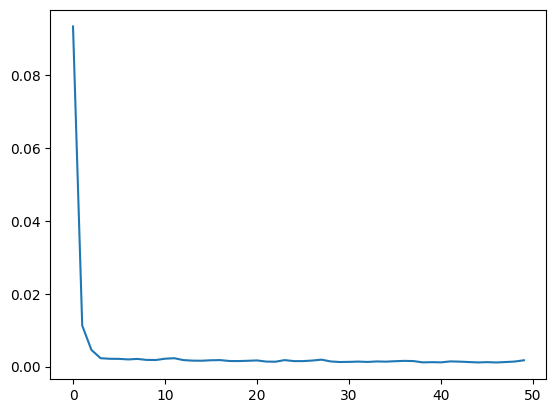

In [444]:
plt.plot(history.history['loss'])
plt.savefig('graphs/LSTM_loss.png')

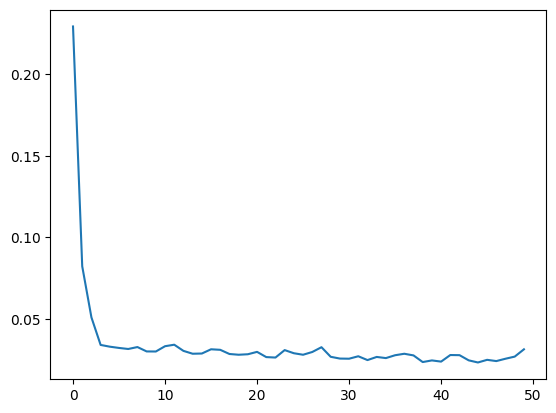

In [445]:
plt.plot(history.history['mean_absolute_error'])
plt.savefig('graphs/LSTM_mae.png')

In [446]:
x_test_dim = np.expand_dims(x_test, axis=2) # 214, 50, 1
prediction_scaled = model.predict(x_test_dim)
prediction_scaled

array([[0.5711322 ],
       [0.56342363],
       [0.54169613],
       [0.5281783 ],
       [0.51543516],
       [0.5108479 ],
       [0.51696944],
       [0.5015983 ],
       [0.5072692 ],
       [0.5165205 ],
       [0.52484715],
       [0.5095017 ],
       [0.5047461 ],
       [0.5003857 ],
       [0.51281846],
       [0.52646345],
       [0.5344501 ],
       [0.5413518 ],
       [0.54280263],
       [0.54209834],
       [0.5238858 ],
       [0.51060224],
       [0.4947699 ],
       [0.47309315],
       [0.45360664],
       [0.4274476 ],
       [0.42893687],
       [0.4442741 ],
       [0.450771  ],
       [0.45671433],
       [0.45018098],
       [0.4385939 ],
       [0.4271448 ],
       [0.40582818],
       [0.39442864],
       [0.40731743],
       [0.42093775],
       [0.4290091 ],
       [0.429237  ],
       [0.44430432],
       [0.45597026],
       [0.46120524],
       [0.44617707],
       [0.42928848],
       [0.4123419 ],
       [0.4026039 ],
       [0.40646496],
       [0.398

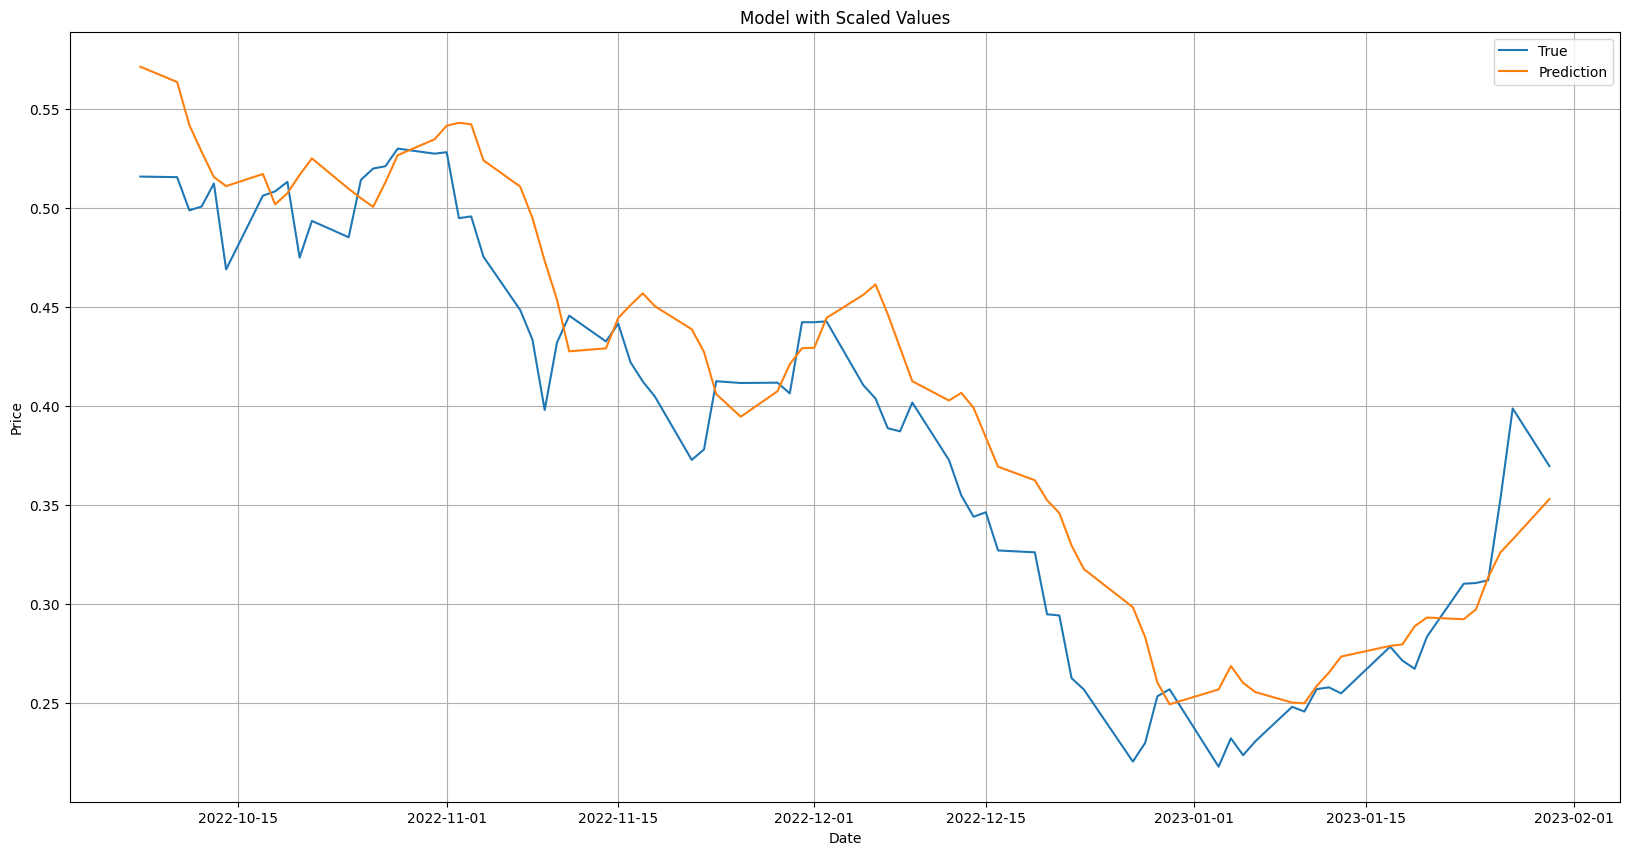

In [447]:
plt.figure(figsize=(20,10))
plt.title('Model with Scaled Values')
plt.plot(test_time, y_test)
plt.plot(test_time, prediction_scaled)
plt.xlabel('Date')
plt.ylabel('Price')

plt.legend(['True', 'Prediction'])
plt.grid()
plt.savefig('graphs/result_testset_scaled.png')

In [448]:
x_test_true = scaler.inverse_transform(x_test)
y_test_true = scaler.inverse_transform(y_test.reshape(-1, 1))
predictions = scaler.inverse_transform(prediction_scaled)
predictions

array([[244.47478 ],
       [241.50012 ],
       [233.11574 ],
       [227.89934 ],
       [222.98192 ],
       [221.21176 ],
       [223.57397 ],
       [217.64243 ],
       [219.83076 ],
       [223.40074 ],
       [226.6139  ],
       [220.69226 ],
       [218.85713 ],
       [217.1745  ],
       [221.97217 ],
       [227.23761 ],
       [230.31958 ],
       [232.98285 ],
       [233.54272 ],
       [233.27094 ],
       [226.24292 ],
       [221.11694 ],
       [215.00745 ],
       [206.64262 ],
       [199.123   ],
       [189.02852 ],
       [189.60321 ],
       [195.52168 ],
       [198.02876 ],
       [200.32222 ],
       [197.80109 ],
       [193.32976 ],
       [188.91167 ],
       [180.68582 ],
       [176.28688 ],
       [181.26051 ],
       [186.51643 ],
       [189.63109 ],
       [189.71902 ],
       [195.53334 ],
       [200.0351  ],
       [202.0552  ],
       [196.25601 ],
       [189.73889 ],
       [183.1994  ],
       [179.44162 ],
       [180.93155 ],
       [178.0

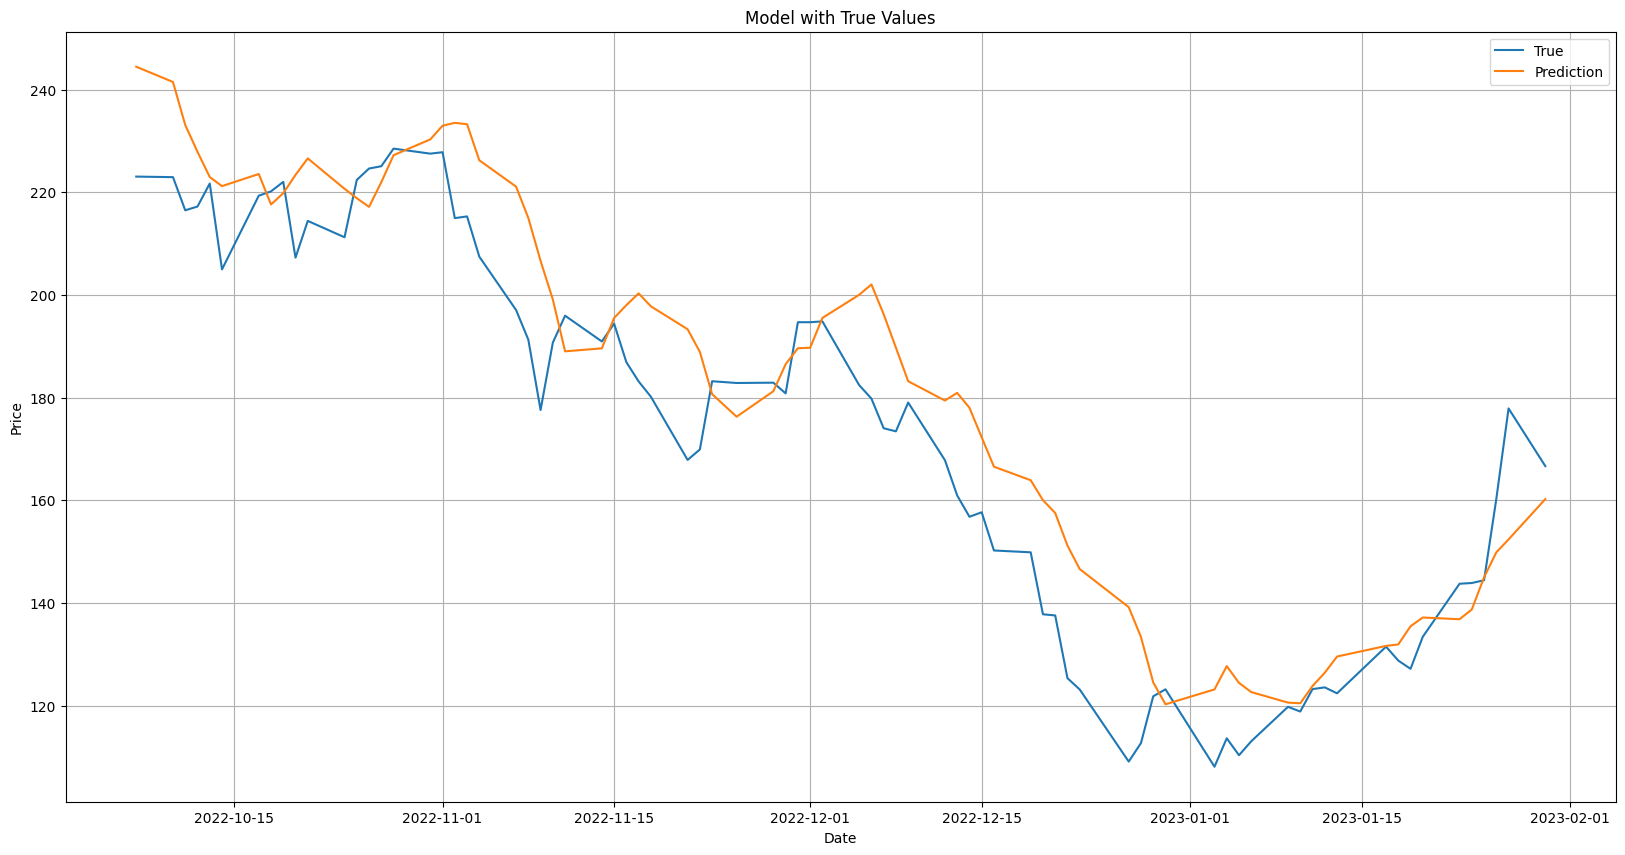

In [449]:
plt.figure(figsize=(20,10))
plt.title('Model with True Values')
plt.plot(test_time, y_test_true)
plt.plot(test_time, predictions)
plt.xlabel('Date')
plt.ylabel('Price')

plt.legend(['True', 'Prediction'])
plt.grid()
plt.savefig('graphs/result_testset_true.png')

In [450]:
predict_days = 10

In [451]:
last_data = x_test_dim[-1,:,:]
last_data = np.expand_dims(last_data,axis=0)

latest = last_data[-50:]
print(latest.shape)

(1, 50, 1)


In [452]:
for i in range(predict_days):
    latest = last_data[-50:]
    print(i, end=' ')
    predict_price = model.predict(latest)
    last_data = np.append(last_data, predict_price)
    last_data = np.reshape(last_data, (1, last_data.shape[0], 1))

0 1 2 3 4 5 6 7 8 9 

In [453]:
predicted_data = np.squeeze(last_data)
latest_predict_data_scaled = predicted_data[-predict_days:]
latest_predict_data = scaler.inverse_transform(latest_predict_data_scaled.reshape(-1, 1))

test_predict = np.append(predictions, latest_predict_data)
test_predict

array([244.47477722, 241.50012207, 233.11573792, 227.89933777,
       222.98191833, 221.21176147, 223.57397461, 217.64242554,
       219.83076477, 223.40074158, 226.61390686, 220.69226074,
       218.85713196, 217.17449951, 221.97216797, 227.23760986,
       230.31958008, 232.98284912, 233.54272461, 233.27093506,
       226.24291992, 221.11694336, 215.00744629, 206.6426239 ,
       199.1230011 , 189.02851868, 189.60321045, 195.52168274,
       198.02876282, 200.32221985, 197.80108643, 193.32975769,
       188.91166687, 180.68582153, 176.28688049, 181.26051331,
       186.51643372, 189.63108826, 189.71902466, 195.53334045,
       200.03509521, 202.0552063 , 196.25601196, 189.7388916 ,
       183.19940186, 179.44161987, 180.93154907, 178.03251648,
       172.27650452, 166.54962158, 163.91586304, 160.02757263,
       157.53245544, 151.18765259, 146.60742188, 139.18878174,
       133.36305237, 124.52229309, 120.2651062 , 123.15637207,
       127.70410156, 124.43034363, 122.64147186, 120.58

In [454]:
predict_interval = pd.date_range(start=test_time[-1], periods=predict_days+1)
part_interval = predict_interval[-predict_days:]
eee = np.concatenate((test_time, part_interval), axis=None)
eee

array(['2022-10-07T00:00:00.000000000', '2022-10-10T00:00:00.000000000',
       '2022-10-11T00:00:00.000000000', '2022-10-12T00:00:00.000000000',
       '2022-10-13T00:00:00.000000000', '2022-10-14T00:00:00.000000000',
       '2022-10-17T00:00:00.000000000', '2022-10-18T00:00:00.000000000',
       '2022-10-19T00:00:00.000000000', '2022-10-20T00:00:00.000000000',
       '2022-10-21T00:00:00.000000000', '2022-10-24T00:00:00.000000000',
       '2022-10-25T00:00:00.000000000', '2022-10-26T00:00:00.000000000',
       '2022-10-27T00:00:00.000000000', '2022-10-28T00:00:00.000000000',
       '2022-10-31T00:00:00.000000000', '2022-11-01T00:00:00.000000000',
       '2022-11-02T00:00:00.000000000', '2022-11-03T00:00:00.000000000',
       '2022-11-04T00:00:00.000000000', '2022-11-07T00:00:00.000000000',
       '2022-11-08T00:00:00.000000000', '2022-11-09T00:00:00.000000000',
       '2022-11-10T00:00:00.000000000', '2022-11-11T00:00:00.000000000',
       '2022-11-14T00:00:00.000000000', '2022-11-15

In [455]:
predict_data = np.append(y_test, np.squeeze(last_data[-50:]))

In [456]:
last_value = y_test_true[-1,0]
pt_predict = [last_value]
for i in test_predict[-10:]:
    pt_predict.append(i)
#pt_predict.append(test_predict[-11:])
pt_predict

[166.660004,
 160.2420191907113,
 166.02153440060664,
 171.1985792825729,
 176.11670464322665,
 180.8622093227531,
 185.45915211295227,
 189.91842387225367,
 194.248661384903,
 198.45802991962768,
 202.55391271941807]

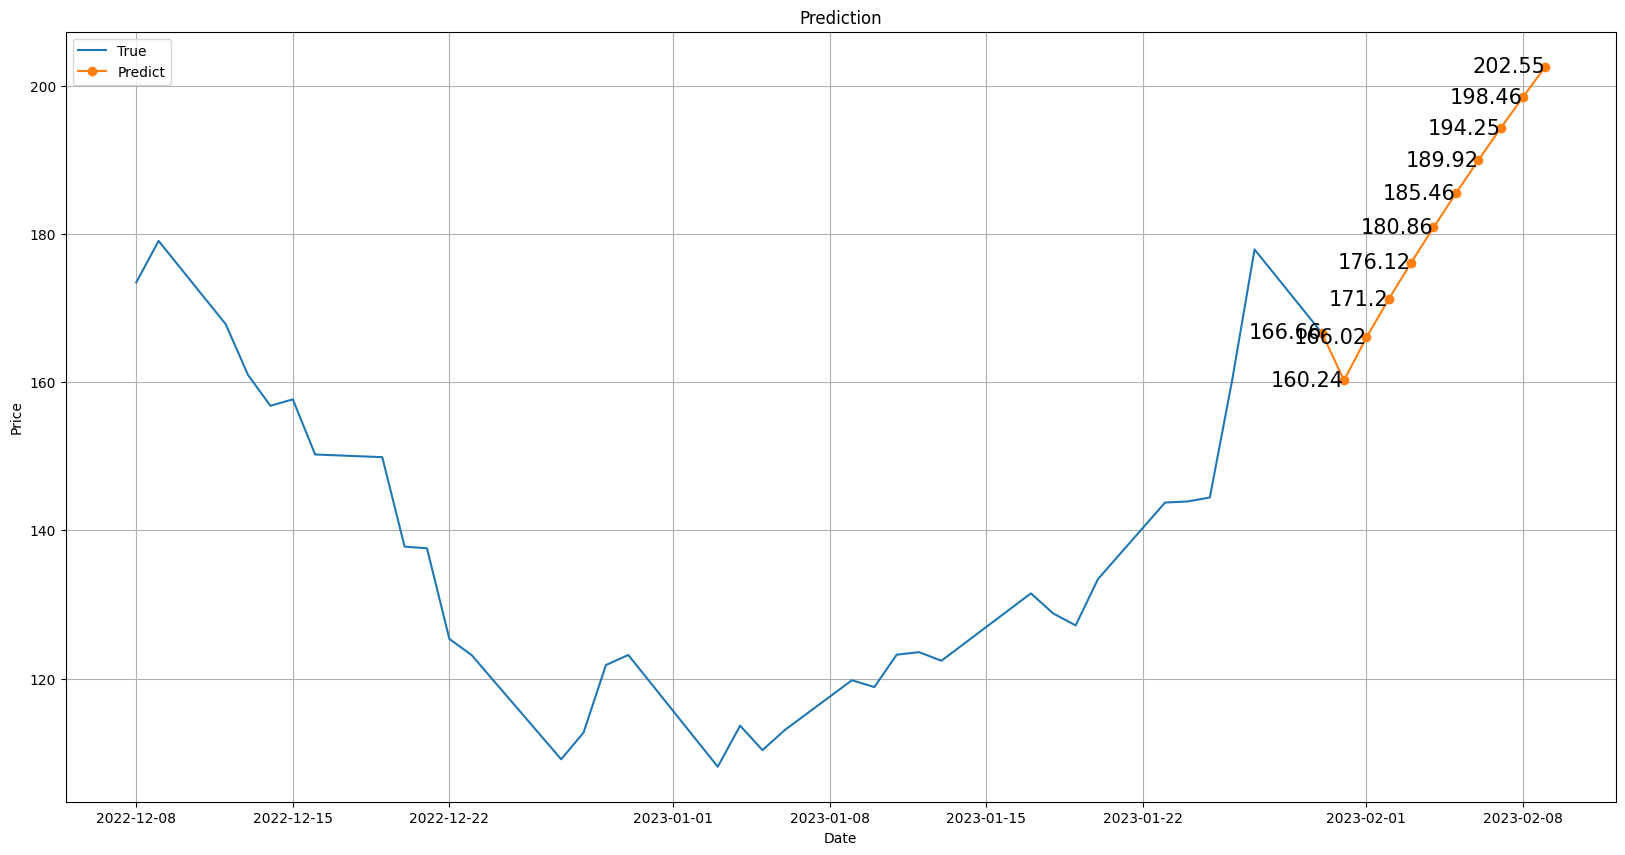

In [457]:
xx, yy = eee[-predict_days-1:], pt_predict

plt.figure(figsize=(20,10))
plt.title('Prediction')
plt.plot(test_time[-35:], y_test_true[-35:])
plt.plot(eee[-predict_days-1:], pt_predict, marker='o')
for a, b in zip(xx, yy):
    plt.text(a, b, b.round(2), fontsize=15, verticalalignment='center', horizontalalignment='right')

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['True', 'Predict'])
plt.grid()
plt.savefig('graphs/predict_10days.png')

In [458]:
test_time

DatetimeIndex(['2022-10-07', '2022-10-10', '2022-10-11', '2022-10-12',
               '2022-10-13', '2022-10-14', '2022-10-17', '2022-10-18',
               '2022-10-19', '2022-10-20', '2022-10-21', '2022-10-24',
               '2022-10-25', '2022-10-26', '2022-10-27', '2022-10-28',
               '2022-10-31', '2022-11-01', '2022-11-02', '2022-11-03',
               '2022-11-04', '2022-11-07', '2022-11-08', '2022-11-09',
               '2022-11-10', '2022-11-11', '2022-11-14', '2022-11-15',
               '2022-11-16', '2022-11-17', '2022-11-18', '2022-11-21',
               '2022-11-22', '2022-11-23', '2022-11-25', '2022-11-28',
               '2022-11-29', '2022-11-30', '2022-12-01', '2022-12-02',
               '2022-12-05', '2022-12-06', '2022-12-07', '2022-12-08',
               '2022-12-09', '2022-12-12', '2022-12-13', '2022-12-14',
               '2022-12-15', '2022-12-16', '2022-12-19', '2022-12-20',
               '2022-12-21', '2022-12-22', '2022-12-23', '2022-12-27',
      

In [459]:
df_new = pd.read_csv('stocks/TSLA_new.csv', index_col=0)
df_new.index = pd.to_datetime(df_new.index, yearfirst=True)
df_new

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-30,178.050003,179.770004,166.500000,166.660004,166.660004,230878800
2023-01-31,164.570007,174.300003,162.779999,173.220001,173.220001,196813500
2023-02-01,173.889999,183.809998,169.929993,181.410004,181.410004,213806300
2023-02-02,187.330002,196.750000,182.610001,188.270004,188.270004,217448300
2023-02-03,183.949997,199.000000,183.690002,189.979996,189.979996,231684200
2023-02-06,193.009995,198.169998,189.919998,194.759995,194.759995,186188100
2023-02-07,196.429993,197.500000,189.550003,196.809998,196.809998,185601700


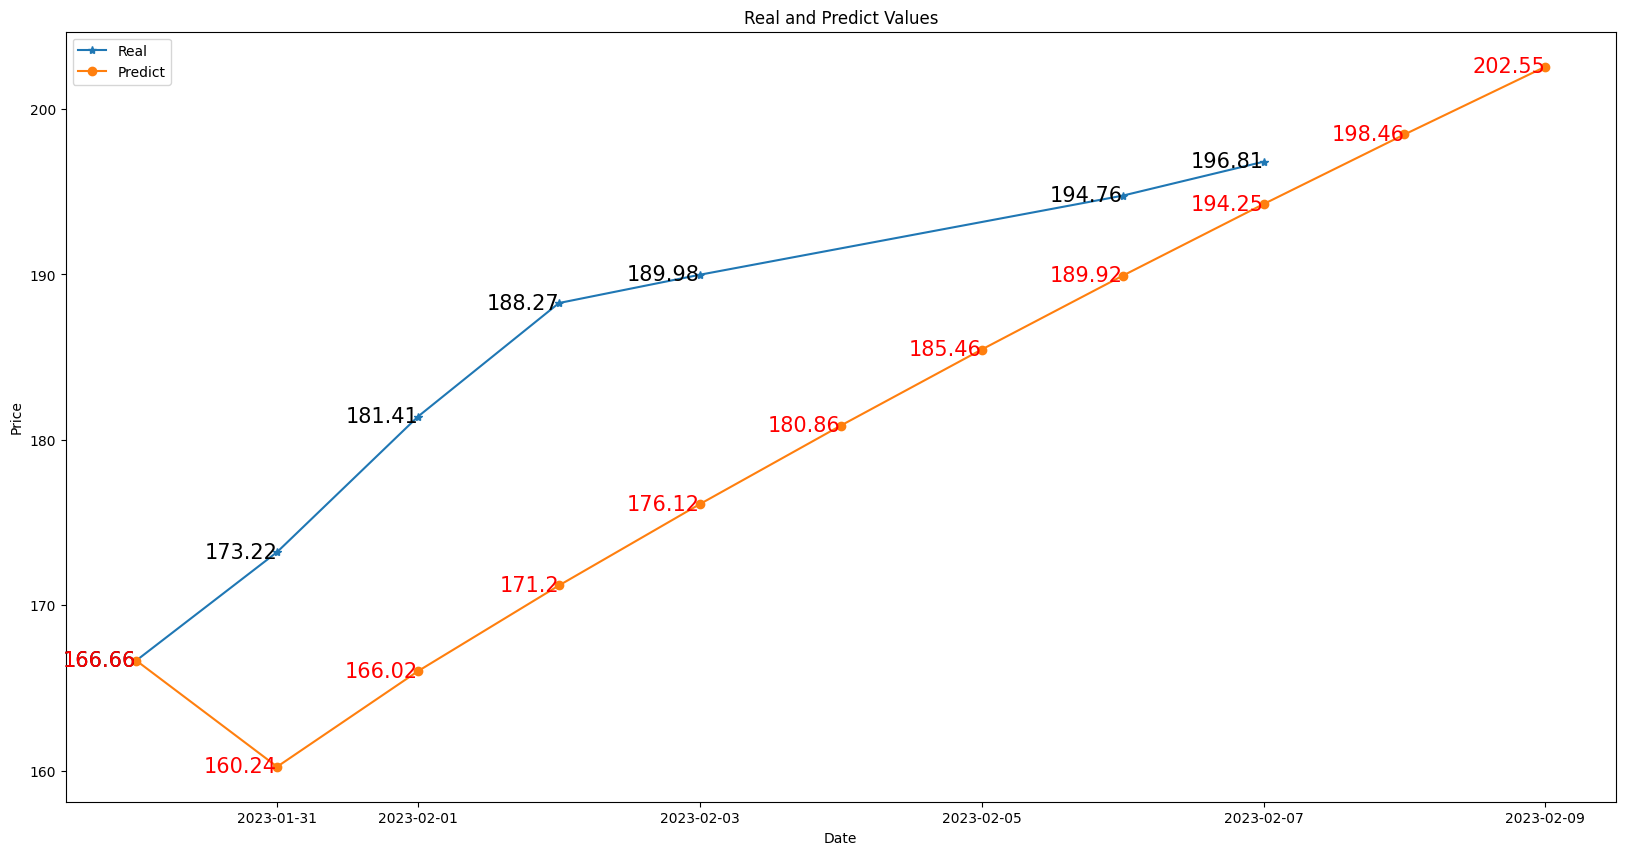

In [460]:
x1, y1 = df_new.index.values, df_new['Close']
x2, y2 = eee[-predict_days-1:], pt_predict

plt.figure(figsize=(20,10))
plt.title('Real and Predict Values')
plt.plot(df_new.index.values, df_new['Close'], marker='*')
for a, b in zip(x1, y1):
    plt.text(a, b, round(b, 2), fontsize=15, verticalalignment='center', horizontalalignment='right')
plt.plot(eee[-predict_days-1:], pt_predict, marker='o')
for a, b in zip(x2, y2):
    plt.text(a, b, b.round(2), fontsize=15, verticalalignment='center', horizontalalignment='right', color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Real', 'Predict'])
plt.savefig('graphs/real_predict.png')